In [14]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict ,Literal


In [29]:
class State(TypedDict):
    a : float
    b : float
    c : float 
    equation : str
    roots : str
    discriminant : float
    result : str
def equation(state: State):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {"equation": equation}

def real_roots(state:State):

    a= state['a']
    b= state['b']
    c= state['c']
    d = state['discriminant']
    root1= -b + d**.5 / (2*a)
    root2= -b - d**.5 / (2*a)
    roots = f"Roots are {root1} and {root2}"
    return {"roots": roots}

def repeated_roots(state:State):

    root = - state['b'] / (2 * state['a'])
    return {"roots": f"Root is {root}"}

def no_real_roots(state:State):

    result = "No real roots"
    return {"roots": result}

def check_roots(state: State) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    d = state['discriminant']
    if d > 0:
        return "real_roots"
    elif d == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"


In [27]:
graph = StateGraph(State)

graph.add_node('find_equation', equation)
graph.add_node("find_descriminant", lambda state: {"discriminant": state['b']**2 - 4*state['a']*state['c']})
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

graph.add_edge(START, 'find_equation')
graph.add_edge('find_equation', 'find_descriminant')
graph.add_conditional_edges('find_descriminant', check_roots)
graph.add_edge('no_real_roots', END)
graph.add_edge('repeated_roots', END)
graph.add_edge('real_roots', END)


workflow = graph.compile()

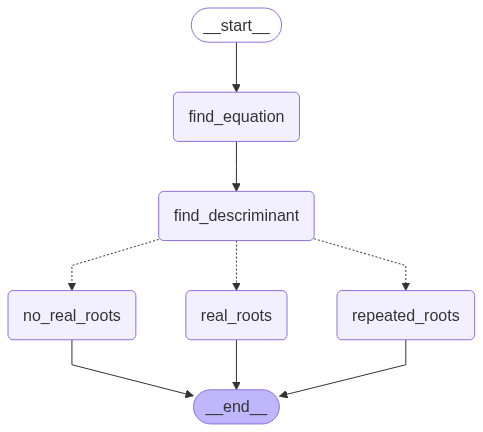

In [28]:
workflow


In [32]:
initia_state = {
    "a": 2,
    "b": 1,
    "c": 2
}
result = workflow.invoke(initia_state)
result

{'a': 2,
 'b': 1,
 'c': 2,
 'equation': '2x^2 + 1x + 2 = 0',
 'roots': 'No real roots',
 'discriminant': -15}